In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Use inspector to print the column names within the "measurement" table (or key) and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# Use inspector to print the column names within the "station" table (or key) and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23')

In [14]:
one_year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
one_year_date

datetime.date(2016, 8, 23)

In [15]:
# Perform a query to retrieve the data and precipitation scores
# Need date range from 09/01/2016 - 08/31/2017, so Measurement.date needs to be all dates greater than '2016-09-01'
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_date).\
    order_by(Measurement.date).all()

# print rows, but could have also just used "results"
for rows in results:
    print(rows)

('2016-08-23', 0.0)
('2016-08-23', 0.15)
('2016-08-23', 0.05)
('2016-08-23', None)
('2016-08-23', 0.02)
('2016-08-23', 1.79)
('2016-08-23', 0.7)
('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', None)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', None)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', None)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Columns will be 'Date' and 'Precipitation'
prcp_df = pd.DataFrame(results, columns =['Date', 'Precipitation'])
prcp_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [17]:
# count to see how many entries
# try to get as close to the 2021 number (provided in the example) as possible
prcp_df.count()

Date             2230
Precipitation    2021
dtype: int64

In [18]:
# Sort the dataframe by date
# Looks like I didn't need to sort because I already did an order by in a previous step, but do this just incase
prcp_sorted_df = prcp_df.sort_values(by=['Date'])
prcp_sorted_df.head()

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [19]:
# There are a lot of "NaN" values. Use dropna to filter these out.
prcp_cleaned_df = prcp_sorted_df.dropna()
prcp_cleaned_df.head(10)

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
6,2016-08-23,0.70
13,2016-08-24,1.45
12,2016-08-24,2.15
11,2016-08-24,1.22
8,2016-08-24,2.15


In [20]:
# count again
prcp_cleaned_df.count()

Date             2021
Precipitation    2021
dtype: int64

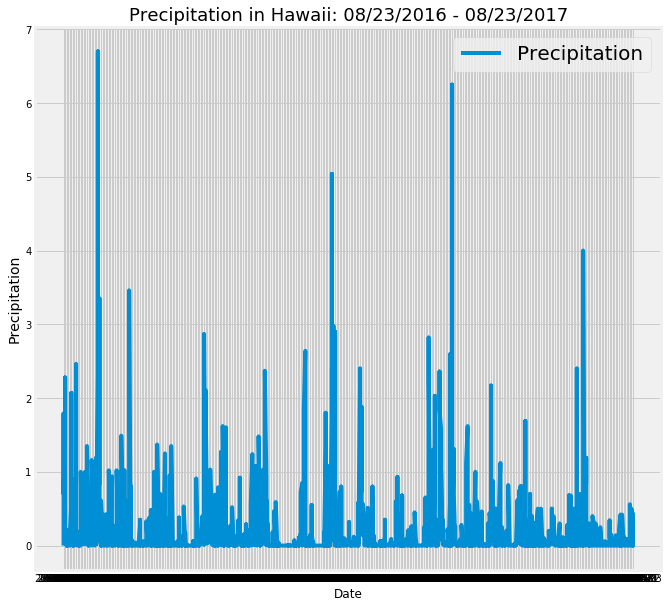

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(10,10))
plt.plot(prcp_cleaned_df["Date"],prcp_cleaned_df["Precipitation"])

# Set Xlabel, Ylabel, and Title
plt.yticks(size= 10)
ax.set_xlabel("Date", size= 12)
ax.set_ylabel("Precipitation", size = 14)
ax.set_title("Precipitation in Hawaii: 08/23/2016 - 08/23/2017", size= 18)

# Set legend
# use "prop=" to make legend larger
# tried setting grid but couldn't get it to work
plt.legend(["Precipitation"],loc= 'best', prop={'size': 20})

plt.show()

In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_cleaned_df.Precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [23]:
# Design a query to show how many stations are available in this dataset (Measurement table)?
# use group_by and count for this
station_count = session.query(Measurement.station).group_by(Measurement.station).count()

station_count

9

In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# use .desc() to get descending order
station_freq = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

station_freq

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
# Use station 'USC00519281' because this station is the most active
active_station = session.query(Measurement.station,\
                func.min(Measurement.tobs),\
                func.max(Measurement.tobs),\
                func.avg(Measurement.tobs)).group_by(Measurement.station).\
                filter(Measurement.station == 'USC00519281').all()

active_station

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [26]:
# Choose the station with the highest number of temperature observations.
# Query station 'USC00519281'
results_station = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= one_year_date).\
    order_by(Measurement.tobs).all()

# print rows, but could have also just used "results"
for rows in results_station:
    print(rows)

('2017-02-02', 59.0)
('2017-02-08', 59.0)
('2017-02-09', 59.0)
('2017-02-03', 60.0)
('2017-04-30', 60.0)
('2017-02-25', 61.0)
('2016-12-15', 62.0)
('2017-01-06', 62.0)
('2017-01-09', 62.0)
('2017-01-10', 62.0)
('2017-02-10', 62.0)
('2017-03-07', 62.0)
('2016-11-07', 63.0)
('2017-01-04', 63.0)
('2017-01-05', 63.0)
('2017-01-11', 63.0)
('2017-01-03', 64.0)
('2017-02-07', 64.0)
('2017-03-08', 64.0)
('2016-12-13', 65.0)
('2017-01-12', 65.0)
('2017-01-28', 65.0)
('2017-02-16', 65.0)
('2017-02-27', 65.0)
('2017-03-18', 65.0)
('2017-05-01', 65.0)
('2016-12-12', 66.0)
('2017-01-27', 66.0)
('2017-03-10', 66.0)
('2017-03-13', 66.0)
('2017-03-16', 66.0)
('2016-11-10', 67.0)
('2016-12-05', 67.0)
('2016-12-06', 67.0)
('2016-12-31', 67.0)
('2017-02-26', 67.0)
('2017-03-06', 67.0)
('2017-03-09', 67.0)
('2017-03-14', 67.0)
('2017-04-04', 67.0)
('2017-04-06', 67.0)
('2017-04-10', 67.0)
('2017-04-17', 67.0)
('2017-04-19', 67.0)
('2017-04-28', 67.0)
('2017-05-09', 67.0)
('2016-11-09', 68.0)
('2016-12-09'

In [27]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Columns will be 'Date' and 'Precipitation'
active_station_df = pd.DataFrame(results_station, columns = ['Date', 'Temperature'])
active_station_df.head()

,Date,Temperature
0,2017-02-02,59.0
1,2017-02-08,59.0
2,2017-02-09,59.0
3,2017-02-03,60.0
4,2017-04-30,60.0


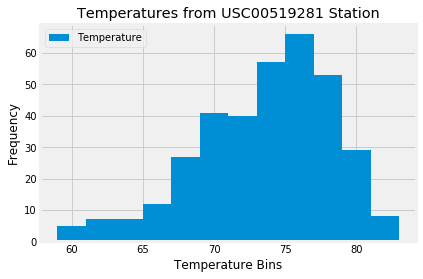

In [28]:
# use .hist to plot histogram
# keep putting in the bin into the picture looks like the example
# looks like 12 might be per each month so bins=12 makes sense
active_station_plot = active_station_df['Temperature'].hist(bins=12)
active_station_plot.set_title('Temperatures from USC00519281 Station')
active_station_plot.set_xlabel('Temperature Bins')
active_station_plot.set_ylabel('Frequency')

#add legend
plt.legend(["Temperature"],loc= 'best', prop={'size': 10})

plt.show()

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_dates = calc_temps('2016-10-10', '2016-10-17')

trip_dates

[(70.0, 77.7, 81.0)]

In [31]:
# determine what trip_dates is
type(trip_dates)

list

In [32]:
# test query to get TAVG
trip_dates[0][1]

77.7

In [33]:
# column 0 is the min
# column 1 is the avg
# column 2 is the max
avg_trip_dates = trip_dates[0][1]
error = trip_dates[0][2] - trip_dates[0][0]
print(f"Error: {error}")

Error: 11.0


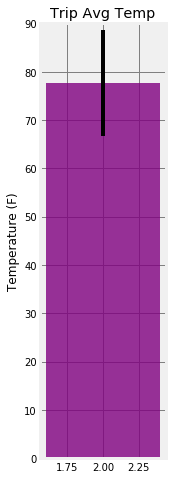

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(2,8))
plt.bar(2,trip_dates[0][1],yerr=error, color='purple', alpha=.80)
plt.ylim(0,90)
plt.ylabel("Temperature (F)")
plt.title("Trip Avg Temp")
plt.grid(color='gray')
plt.show()

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# use date ranges 10/10/2016 - 10/17/2016
total_trip_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp), Station.name,\
    Station.latitude, Station.longitude, Station.elevation).\
    join(Station, Measurement.station==Station.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= "2016-10-10", Measurement.date <= "2016-10-17").\
    order_by((func.sum(Measurement.prcp)).desc()).all()

total_trip_rainfall

[('USC00516128',
  1.1400000000000001,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  0.36000000000000004,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519523',
  0.12,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00513117', 0.08, 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830',
  0.08,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397', 0.01, 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00517948', None, 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
